## TST *args and **kwargs

## Tips on how to use transformers:

In [1]:
from tsai.all import *
computer_setup()

c:\Users\karll\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


os              : Windows-10-10.0.22621-SP0
python          : 3.9.13
tsai            : 0.3.5
fastai          : 2.7.11
fastcore        : 1.5.28
torch           : 1.13.1+cpu
cpu cores       : 6
threads per cpu : 2
RAM             : 15.9 GB
GPU memory      : [6.0] GB


# Load data 🔢

In [2]:
##Data needs to be of the format [length, features, sequence]
import sys, os
import pandas as pd

from Preprocessing.preprocessing import preprocessing

df_alpacca = pd.read_csv('Data\Stock\StockBars\AAPL_minute')
df_twelve = pd.read_csv('Data\\twelve_data\AAPL_1min')

df = df_twelve
data = 'twelve'
index = '1min'
CLF = False
buckets = 10
lag = 3
sequence_length = 20

data_train, data_test ,s = preprocessing(df,
                                         sequence_length = sequence_length, 
                                         lag=lag, 
                                         TSAI = True, 
                                         CLF = CLF, 
                                         data = data, 
                                         index=index,
                                         dif_all=False, 
                                         buckets=buckets)

X, y, splits = combine_split_data([data_train[0], data_test[0]],[data_train[1], data_test[1]])


print(X.shape, y.shape)

torch.Size([199916, 12, 20]) torch.Size([199916])


SuggestedLRs(valley=0.00015848931798245758)

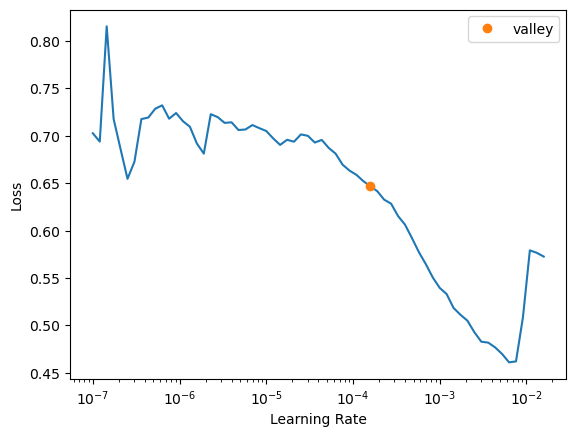

In [3]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls.one_batch()

learn = ts_learner(dls, TSTPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

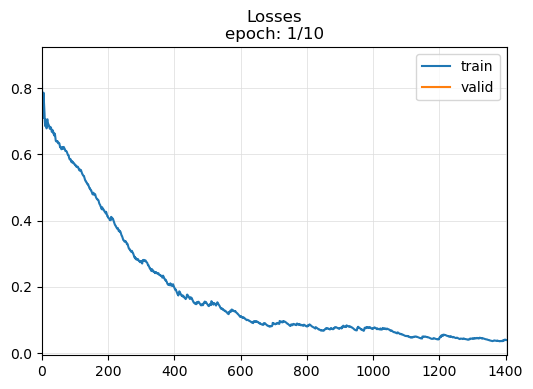

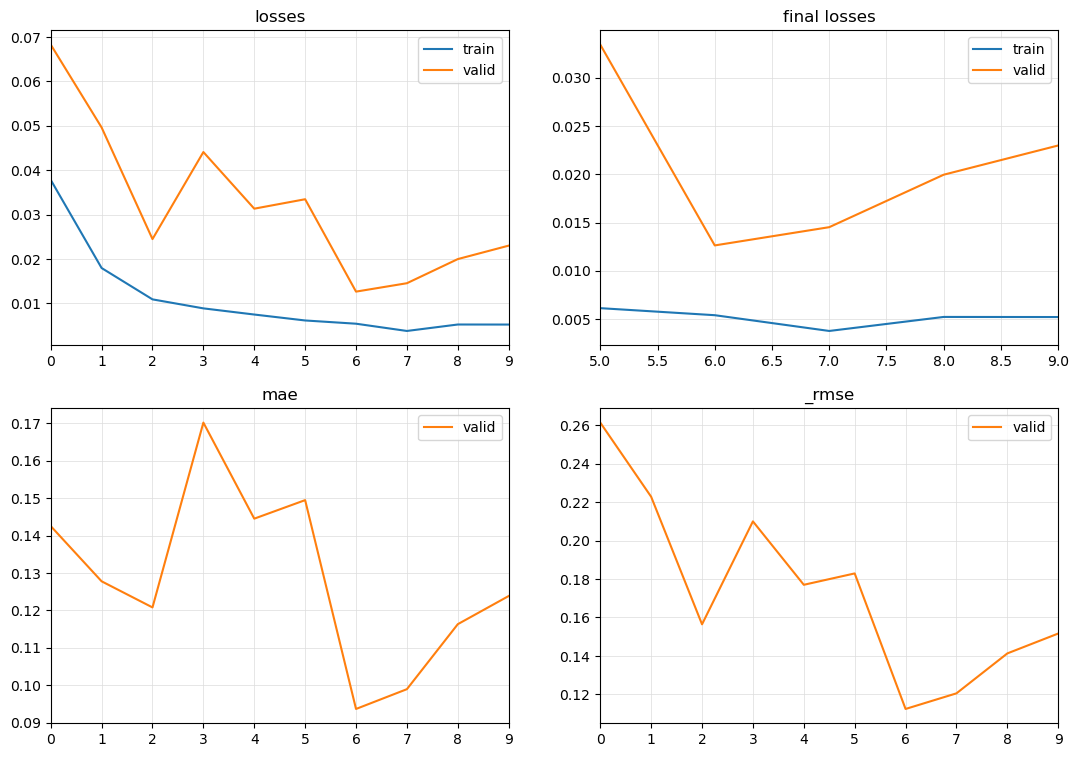

In [4]:
learn = ts_learner(dls, TSTPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(10,1e-4)

In [5]:
PATH = Path('./Pretrained/TSTRegression_nodiff_fullset.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

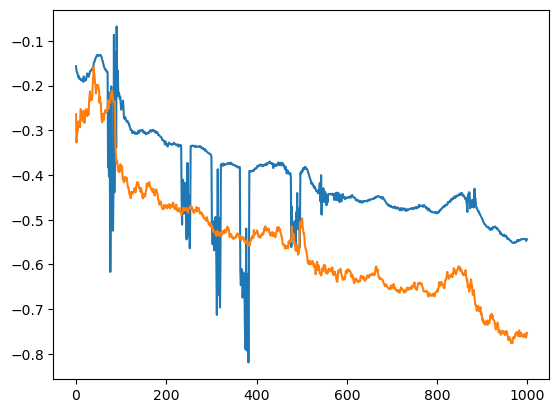

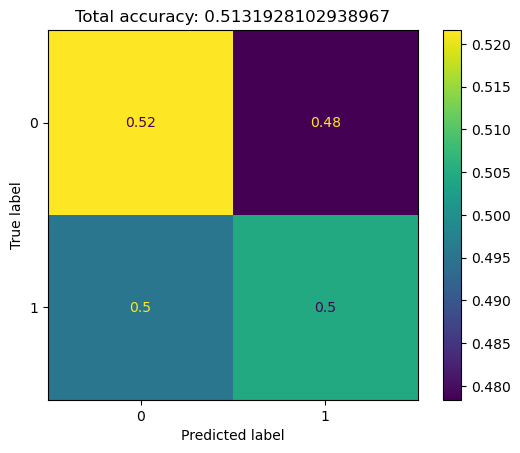

In [11]:
PATH = Path('./Pretrained/TSTRegression_nodiff_fullset.pkl')
learn = load_learner(PATH, cpu=False)

from sklearn.metrics import ConfusionMatrixDisplay

test_x = X[splits[1]] #Need to be replaced with actual test data
test_y = y[splits[1]]

learn_curr = learn

preds, _, y_preds = learn_curr.get_X_preds(test_x)

test_y_converted = [1 if test_y[i] > test_y[i-1] else -1 for i in range(1, len(test_y))]
preds_y_converted = [1 if y_preds[i][0] > y_preds[i-1][0] else -1 for i in range(1, len(y_preds))]

y_preds_list = [y[0] for y in y_preds]

plt.plot(y_preds_list[:1000])
plt.plot(test_y[:1000])
plt.show()

accuracy = sum(y1 * y2 > 0 for y1, y2 in zip(preds_y_converted, test_y_converted))/len(preds_y_converted)

disp = ConfusionMatrixDisplay.from_predictions(test_y_converted, preds_y_converted, display_labels=range(2), normalize = 'true')
plt.title('Total accuracy: '+str(accuracy))
plt.show()


# LSTM

SuggestedLRs(valley=0.0063095735386013985)

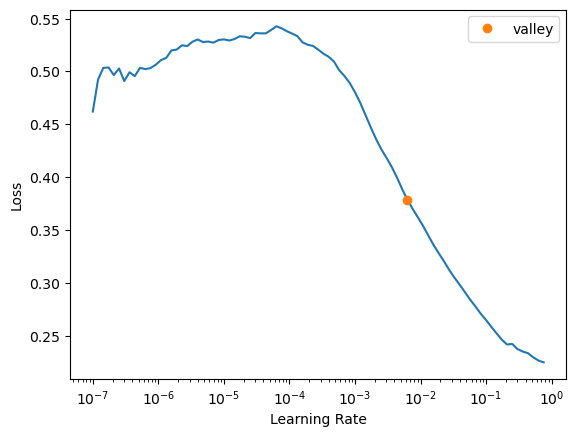

In [7]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls.one_batch()

learn = ts_learner(dls, LSTMPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

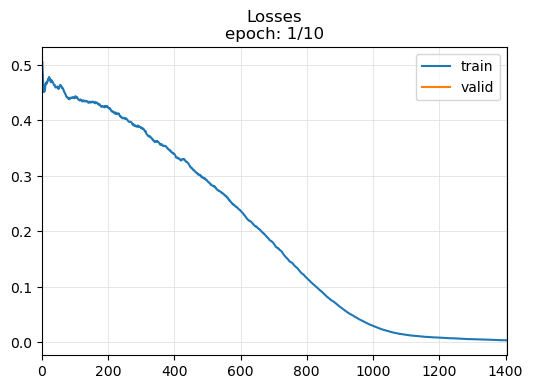

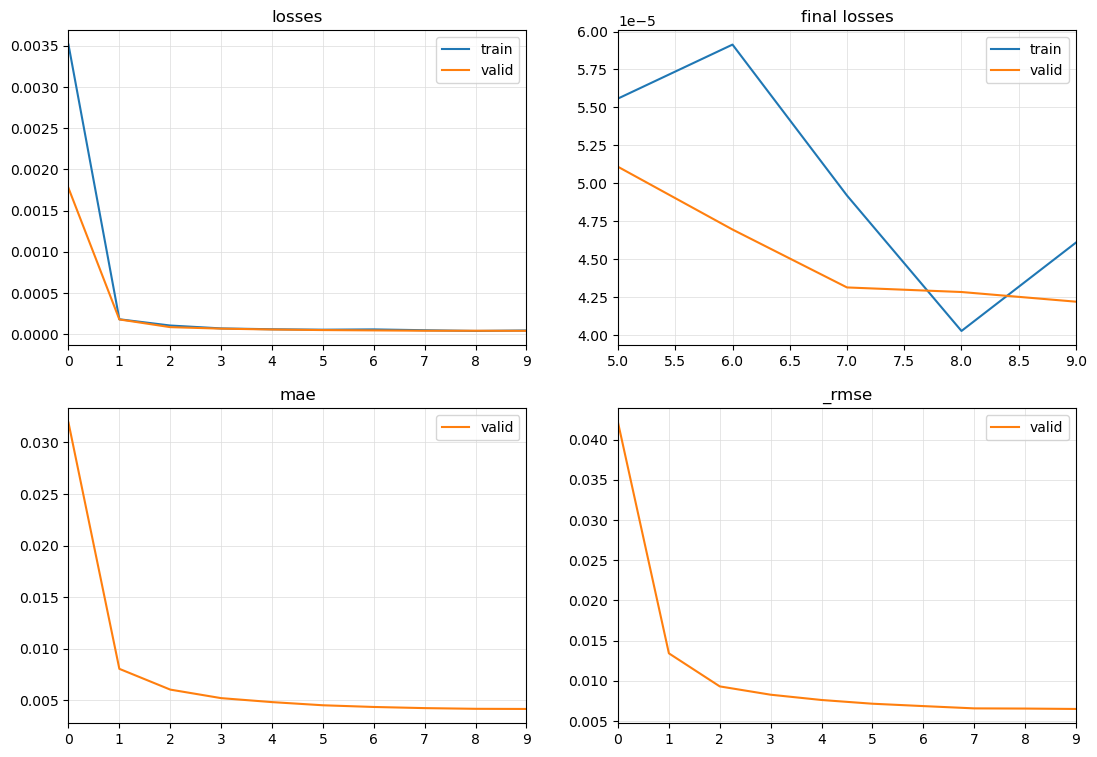

In [8]:
learn = ts_learner(dls, LSTMPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(10,1e-4)

In [9]:
PATH = Path('./Pretrained/LSTM_nodiff_full.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

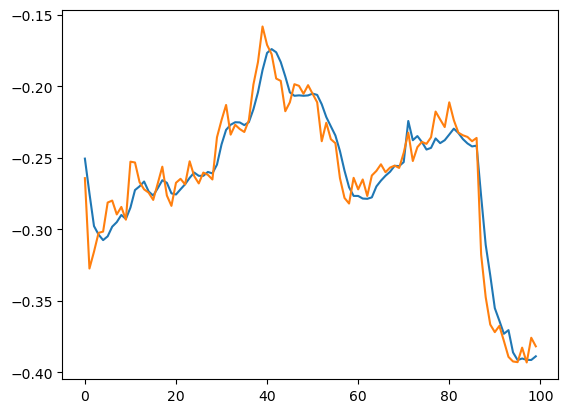

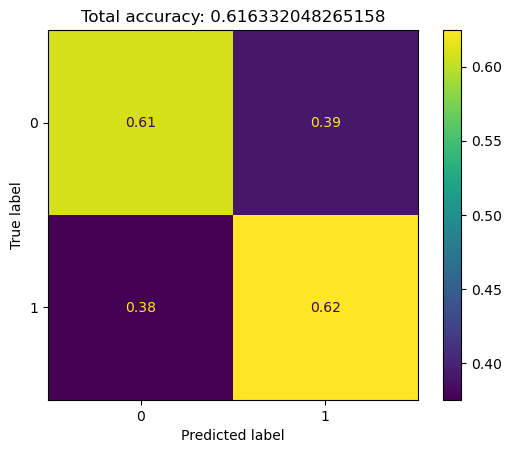

In [10]:
PATH = Path('./Pretrained/LSTM_nodiff_full.pkl')
learn = load_learner(PATH, cpu=False)

from sklearn.metrics import ConfusionMatrixDisplay

test_x = X[splits[1]] #Need to be replaced with actual test data
test_y = y[splits[1]]

learn_curr = learn

preds, _, y_preds = learn_curr.get_X_preds(test_x)

test_y_converted = [1 if test_y[i] > test_y[i-1] else -1 for i in range(1, len(test_y))]
preds_y_converted = [1 if y_preds[i][0] > y_preds[i-1][0] else -1 for i in range(1, len(y_preds))]

y_preds_list = [y[0] for y in y_preds]

plt.plot(y_preds_list[:100])
plt.plot(test_y[:100])
plt.show()

accuracy = sum(y1 * y2 > 0 for y1, y2 in zip(preds_y_converted, test_y_converted))/len(preds_y_converted)

disp = ConfusionMatrixDisplay.from_predictions(test_y_converted, preds_y_converted, display_labels=range(2), normalize = 'true')
plt.title('Total accuracy: '+str(accuracy))
plt.show()


# LSTM-FCN

SuggestedLRs(valley=0.0006918309954926372)

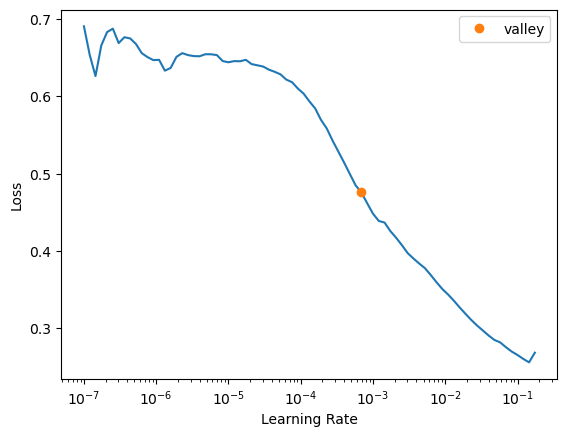

In [12]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls.one_batch()

learn = ts_learner(dls, LSTM_FCNPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

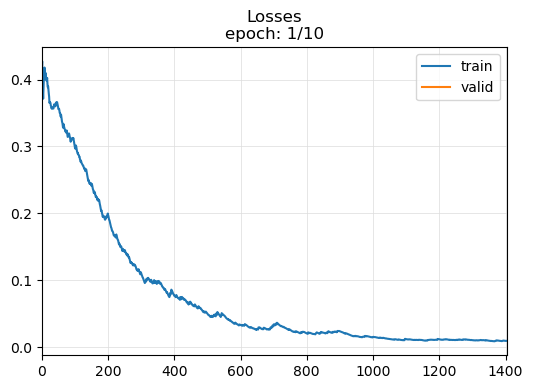

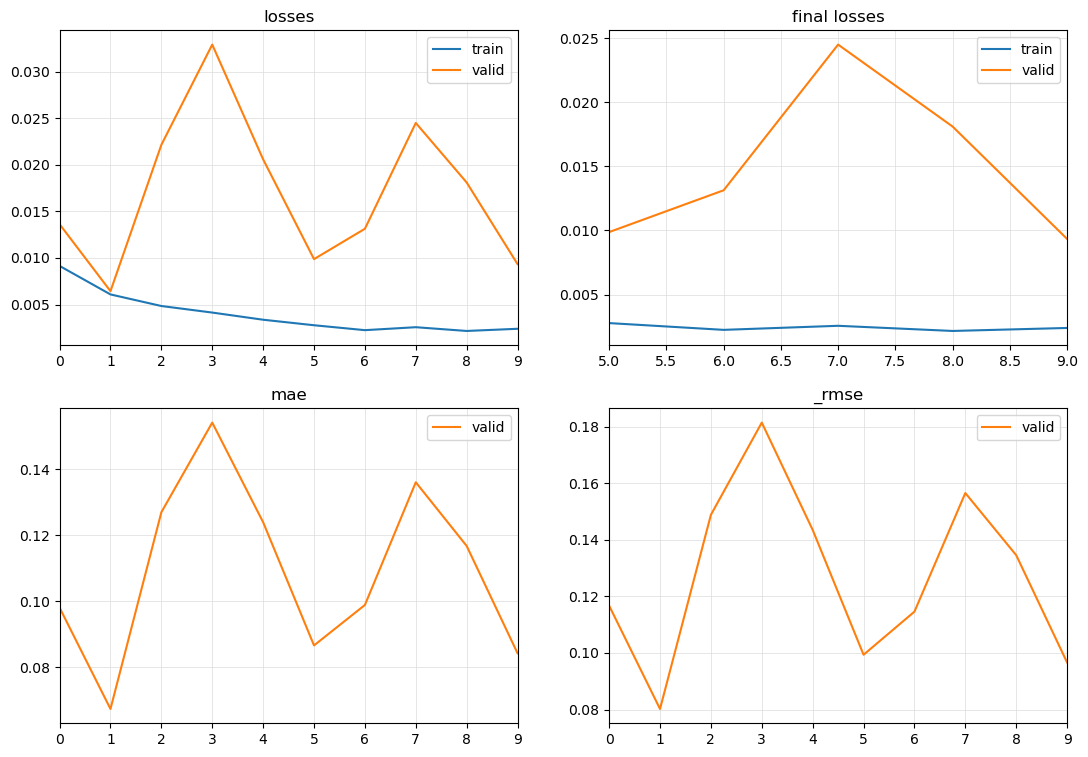

In [13]:
learn = ts_learner(dls, LSTM_FCNPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(10,1e-4)

In [14]:
PATH = Path('./Pretrained/LSTMFCNRegression_nodiff_full.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

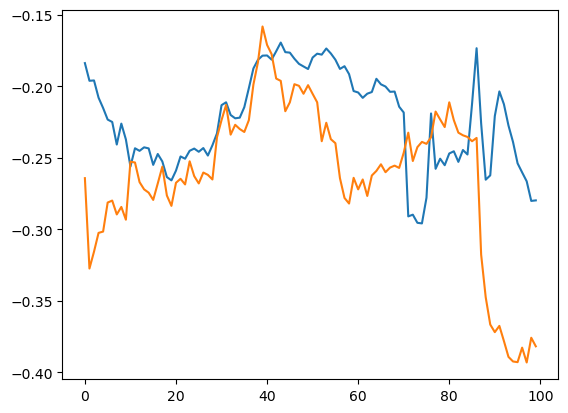

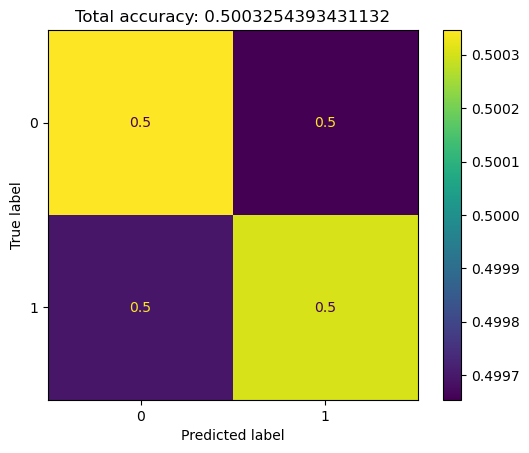

In [17]:
PATH = Path('./Pretrained/LSTMFCNRegression_nodiff_full.pkl')
learn = load_learner(PATH, cpu=False)

from sklearn.metrics import ConfusionMatrixDisplay

test_x = X[splits[1]] #Need to be replaced with actual test data
test_y = y[splits[1]]

learn_curr = learn

preds, _, y_preds = learn_curr.get_X_preds(test_x)

test_y_converted = [1 if test_y[i] > test_y[i-1] else -1 for i in range(1, len(test_y))]
preds_y_converted = [1 if y_preds[i][0] > y_preds[i-1][0] else -1 for i in range(1, len(y_preds))]

y_preds_list = [y[0] for y in y_preds]

plt.plot(y_preds_list[:100])
plt.plot(test_y[:100])
plt.show()

accuracy = sum(y1 * y2 > 0 for y1, y2 in zip(preds_y_converted, test_y_converted))/len(preds_y_converted)

disp = ConfusionMatrixDisplay.from_predictions(test_y_converted, preds_y_converted, display_labels=range(2), normalize = 'true')
plt.title('Total accuracy: '+str(accuracy))
plt.show()


# Mini-Rocket

In [3]:
mrf = MiniRocketFeatures(X.shape[1], X.shape[2]).to(default_device())
X_train = X[splits[0]]
mrf.fit(X_train)
X_feat = get_minirocket_features(X, mrf, chunksize=1024, to_np=True)
X_feat.shape, type(X_feat)

((199916, 9996, 1), numpy.ndarray)

In [5]:
dls = get_ts_dls(X_feat, y, splits=splits, bs=128)
model = build_ts_model(MiniRocketHead, dls=dls)
model.head

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): BatchNorm1d(9996, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Linear(in_features=9996, out_features=1, bias=True)
)

SuggestedLRs(valley=7.585775892948732e-05)

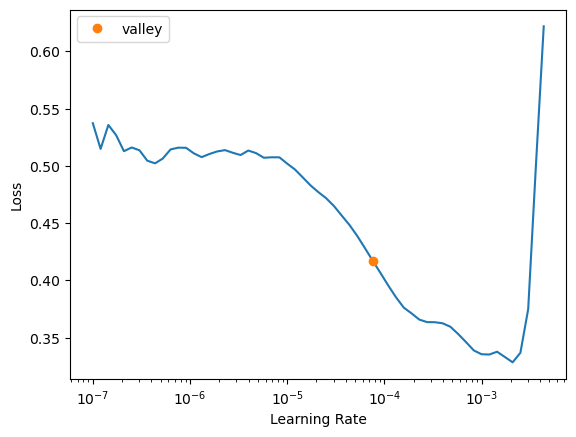

In [6]:
tfms  = [None, [TSRegression()]]
learn = ts_learner(dls, model, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

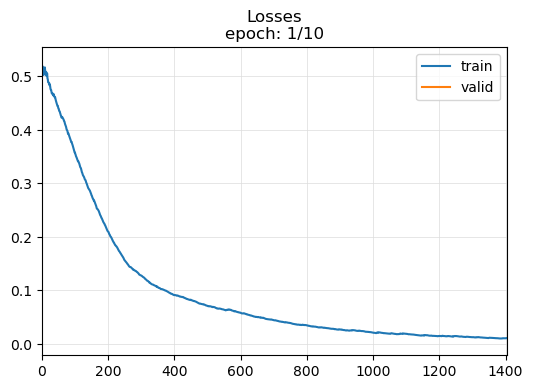

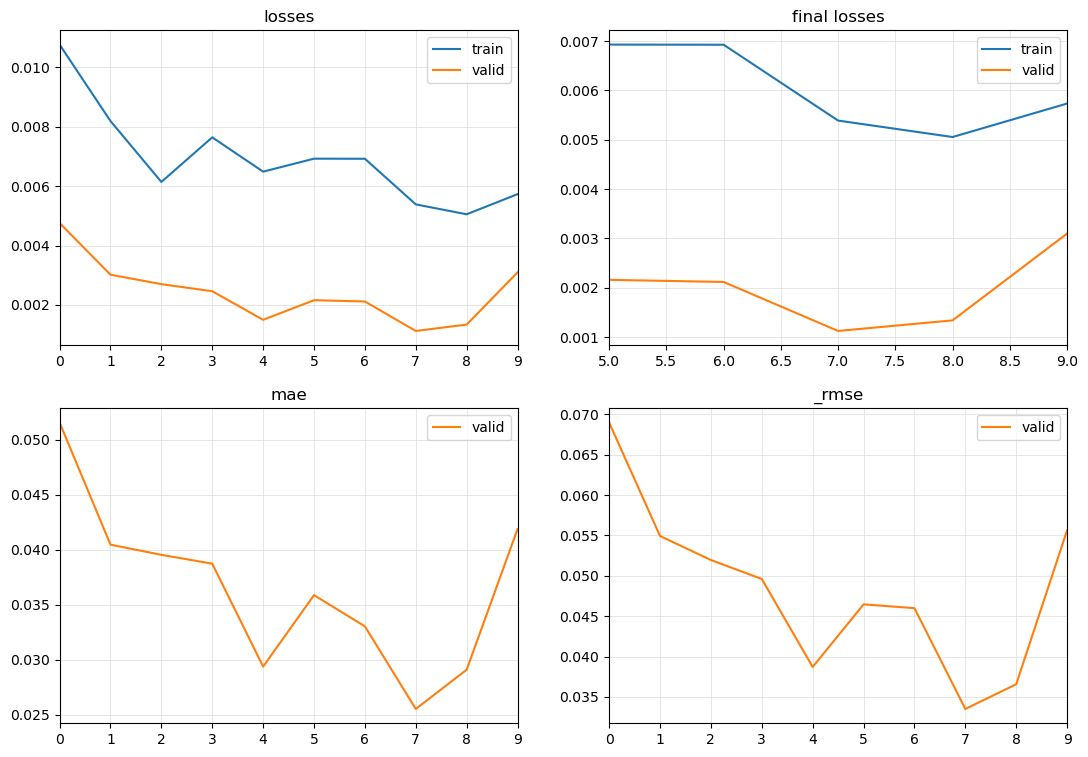

In [7]:
learn = ts_learner(dls, model, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(10,4e-5)

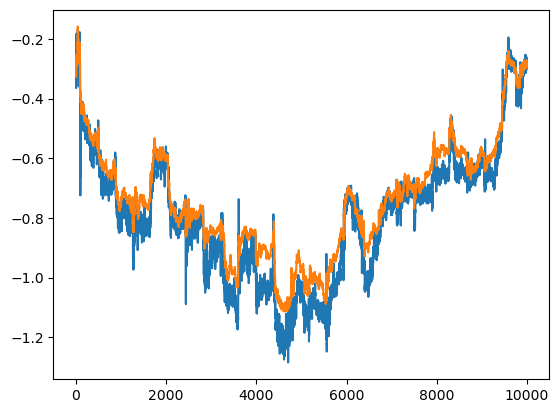

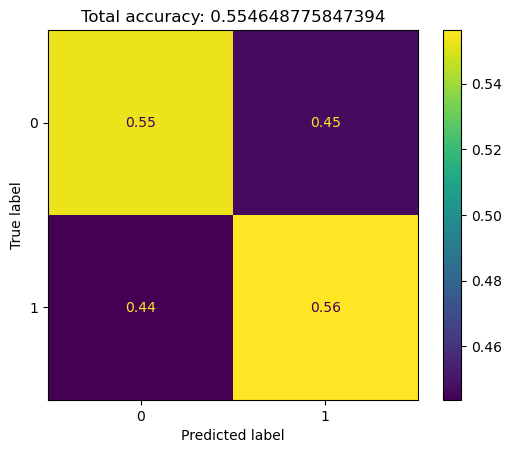

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

test_x = X_feat[splits[1]] #Need to be replaced with actual test data
test_y = y[splits[1]]

learn_curr = learn

preds, _, y_preds = learn_curr.get_X_preds(test_x)

test_y_converted = [1 if test_y[i] > test_y[i-1] else -1 for i in range(1, len(test_y))]
preds_y_converted = [1 if y_preds[i][0] > y_preds[i-1][0] else -1 for i in range(1, len(y_preds))]

y_preds_list = [y[0] for y in y_preds]

plt.plot(y_preds_list[:10000])
plt.plot(test_y[:10000])
plt.show()

accuracy = sum(y1 * y2 > 0 for y1, y2 in zip(preds_y_converted, test_y_converted))/len(preds_y_converted)

disp = ConfusionMatrixDisplay.from_predictions(test_y_converted, preds_y_converted, display_labels=range(2), normalize = 'true')
plt.title('Total accuracy: '+str(accuracy))
plt.show()
